### <font color = blue>Building a multiple linear regression model for the prediction of car prices for a Chinese automobile company "Geely Auto" who aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts, and in the process find out the important variables which affect the car pricing.</font>

In [1]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Output display formatting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Defining the working directory
os.chdir("C:/Users/Kaushal/Desktop/Data Science & Machine Learning/Upgrad's PG-Diploma in AI and ML/Upgrad Assignments/2. Linear Regression Assignment")

## <font color = blue>Step 1 : Reading and Understanding the Data</font>

In [5]:
# Reading the dataset
car_pr=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
# Displaying the first 5 rows in the dataset
car_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Checking the dataset for null values in a column and their datatypes 
car_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
car_pr.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
# Dropping the car_ID column as it represents the row count and has no role in the price prediction
car_pr.drop('car_ID', axis=1, inplace=True)

In [10]:
# Checking the columns after removing the column car_ID
car_pr.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
# Extracting the carname from the column CarName by removing the model name
car_pr['CarName']=car_pr['CarName'].apply(lambda x:x.split()[0])

In [12]:
# Checking for the different values under CarName
car_pr['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
maxda           2
vw              2
porcshce        1
Nissan          1
mercury         1
vokswagen       1
toyouta         1
Name: CarName, dtype: int64

In [13]:
# Converting the CarName values into uppercase
car_pr['CarName']=car_pr['CarName'].str.upper()

In [14]:
car_pr['CarName'].nunique()

27

In [15]:
# Sorting them by index to get the similar carnames which have their names wrong 
car_pr['CarName'].value_counts().sort_index()

ALFA-ROMERO     3
AUDI            7
BMW             8
BUICK           8
CHEVROLET       3
DODGE           9
HONDA          13
ISUZU           4
JAGUAR          3
MAXDA           2
MAZDA          15
MERCURY         1
MITSUBISHI     13
NISSAN         18
PEUGEOT        11
PLYMOUTH        7
PORCSHCE        1
PORSCHE         4
RENAULT         2
SAAB            6
SUBARU         12
TOYOTA         31
TOYOUTA         1
VOKSWAGEN       1
VOLKSWAGEN      9
VOLVO          11
VW              2
Name: CarName, dtype: int64

In [16]:
# Correcting the wrong car names
car_pr['CarName']=car_pr['CarName'].str.replace('MAXDA','MAZDA')
car_pr['CarName']=car_pr['CarName'].str.replace('PORCSHCE','PORSCHE')
car_pr['CarName']=car_pr['CarName'].str.replace('TOYOUTA','TOYOTA')
car_pr['CarName']=car_pr['CarName'].str.replace('VOKSWAGEN','VOLKSWAGEN')
car_pr['CarName']=car_pr['CarName'].str.replace('VW','VOLKSWAGEN')

In [17]:
# Checking the carnames after correction
car_pr['CarName'].value_counts().sort_index()

ALFA-ROMERO     3
AUDI            7
BMW             8
BUICK           8
CHEVROLET       3
DODGE           9
HONDA          13
ISUZU           4
JAGUAR          3
MAZDA          17
MERCURY         1
MITSUBISHI     13
NISSAN         18
PEUGEOT        11
PLYMOUTH        7
PORSCHE         5
RENAULT         2
SAAB            6
SUBARU         12
TOYOTA         32
VOLKSWAGEN     12
VOLVO          11
Name: CarName, dtype: int64

In [18]:
# Hence the carname levels reduced from 27 to 22
car_pr['CarName'].nunique()

22

## <font color=blue>Step 2: Visualising the Data</font>

### <font color=purple>Visualising the numerical variables</font>

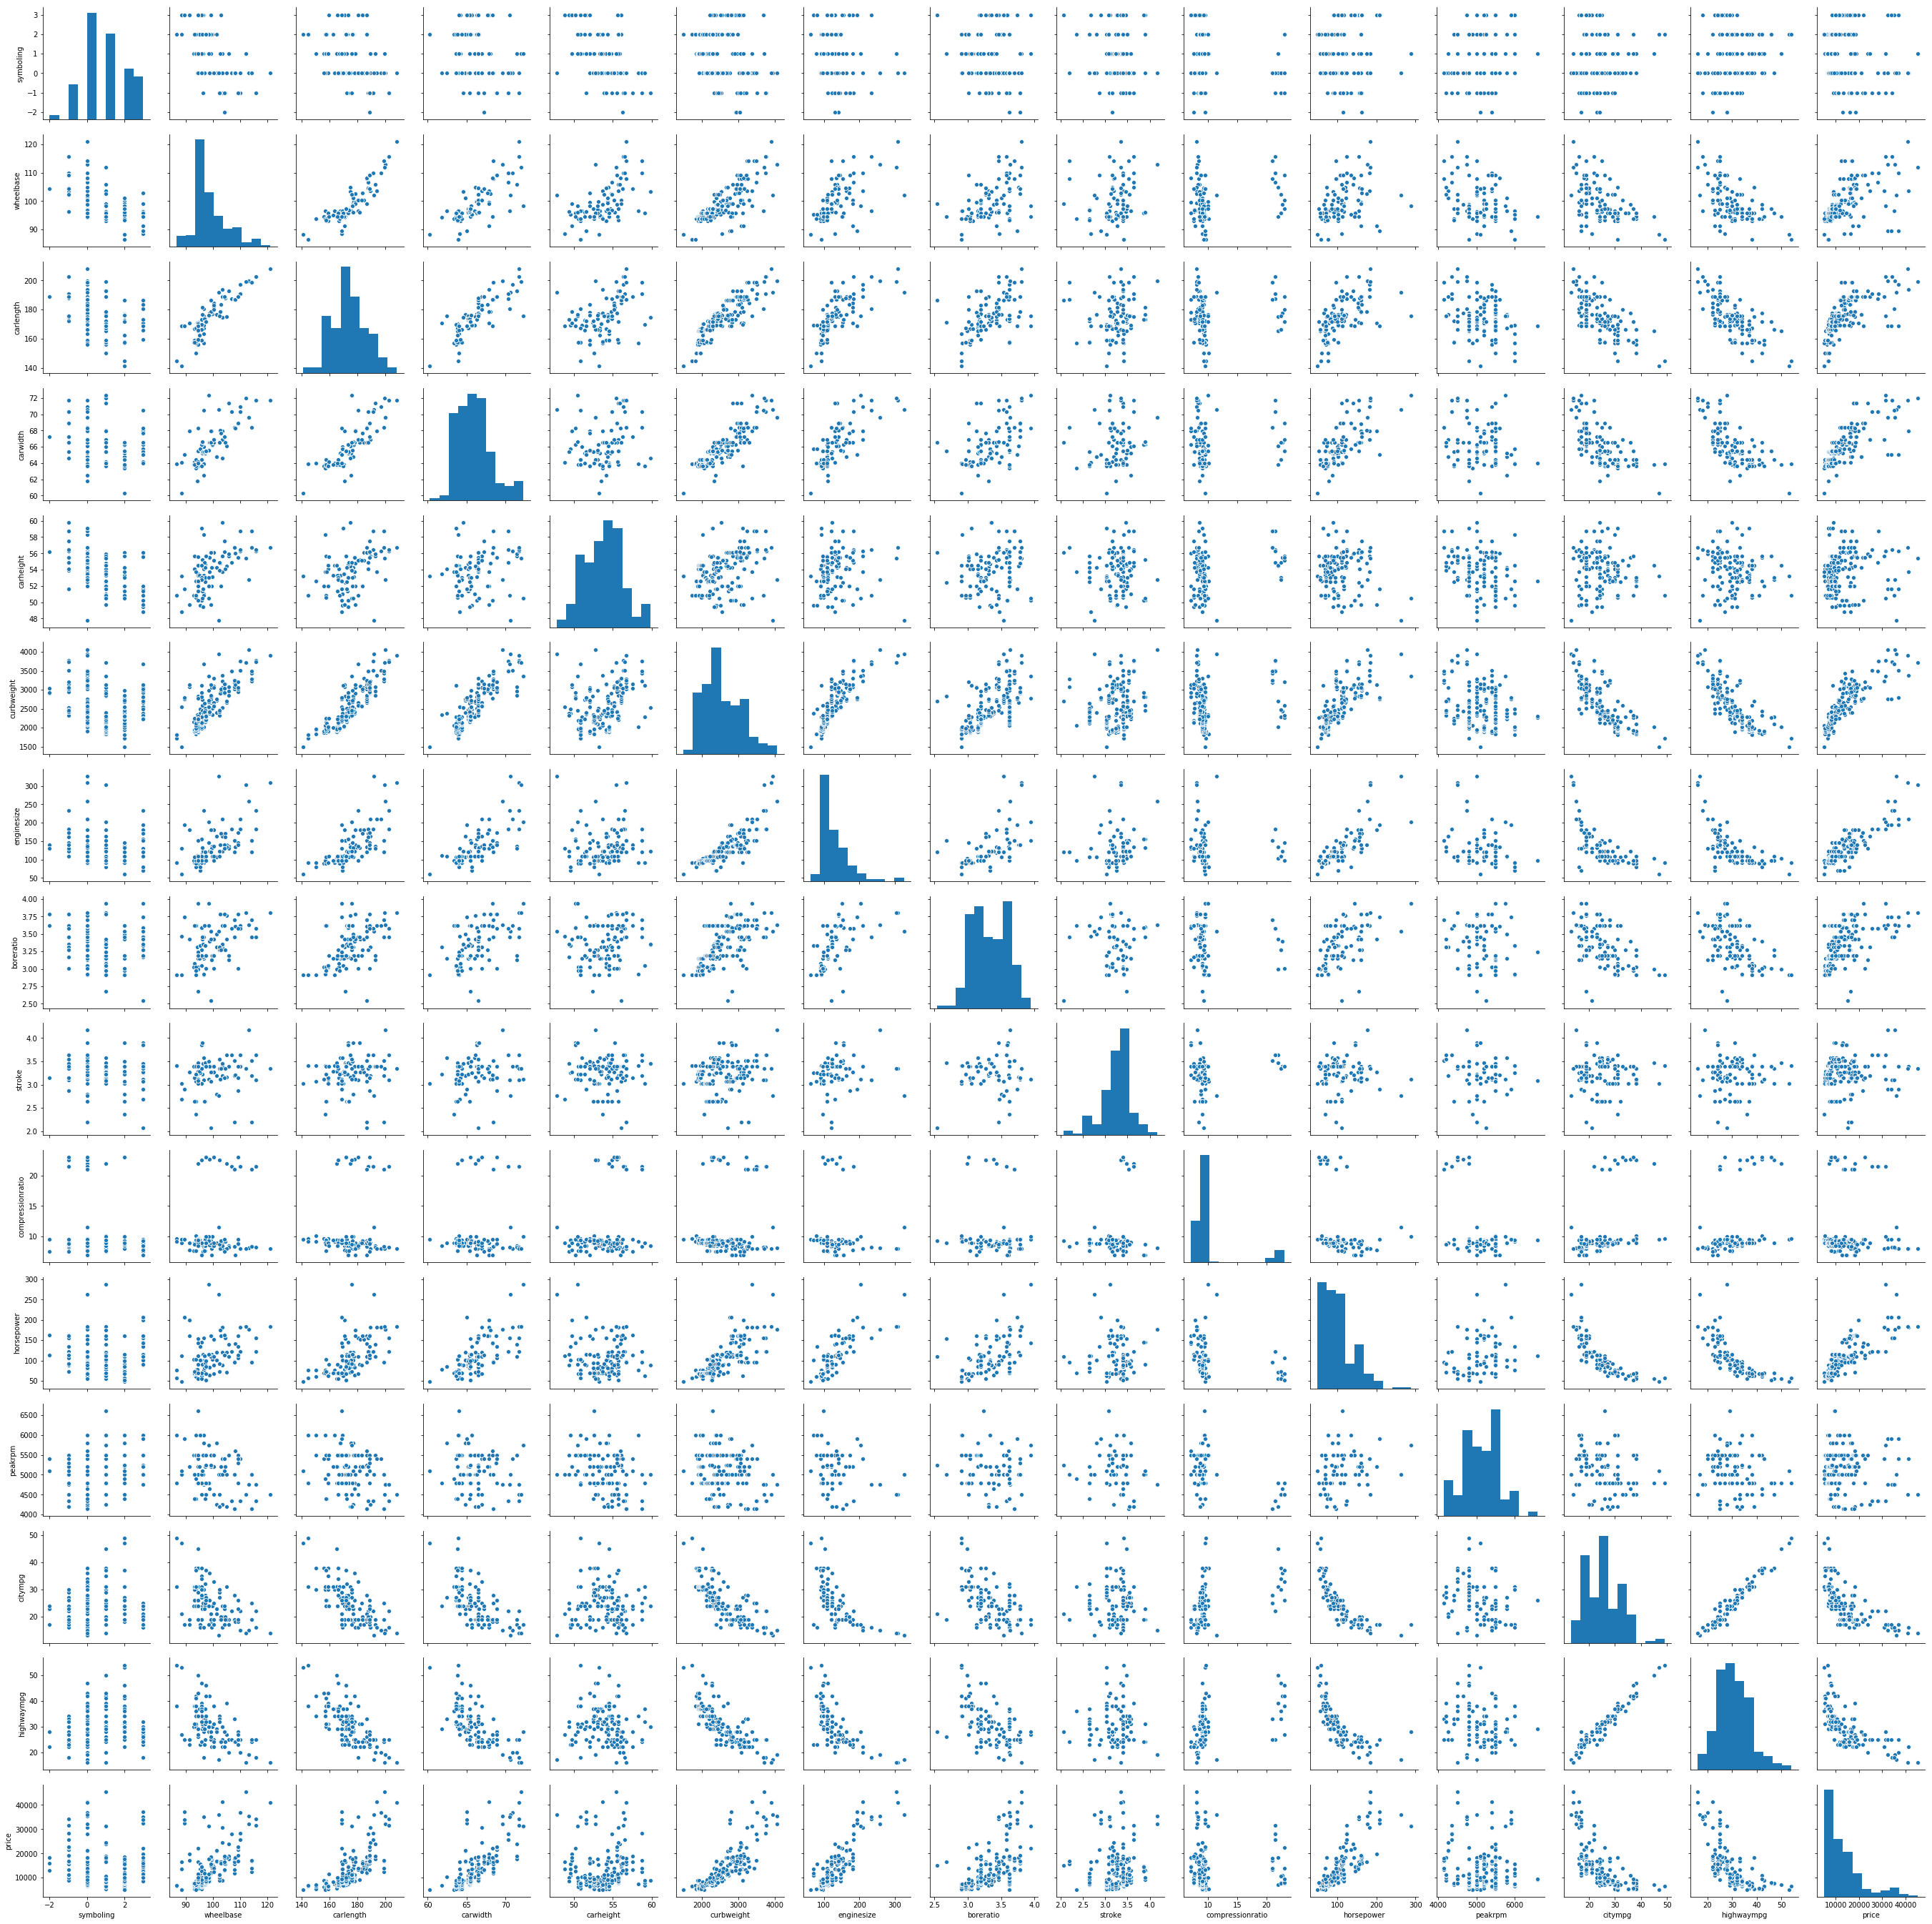

In [19]:
sns.pairplot(data=car_pr)
plt.show()

## <font color=green>Observations from the pairplot above:
The pairplot above clearly shows that price has some linear relationship with various independent variables and hence we can use the LinearRegression model here, also it could be noted that many variables have a high correlation between them which could lead to the problem of multicollinearity and needs to be handled. Few pairs which have a visible high correlation are:<br> HighwayMpg & CityMpg; HighwayMpg & CarLength; HighwayMpg & CurbWeight; Highwaympg & EngineSize etc.</font>

### <font color=purple>Visualising the categorical variables</font>

In [20]:
car_pr.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

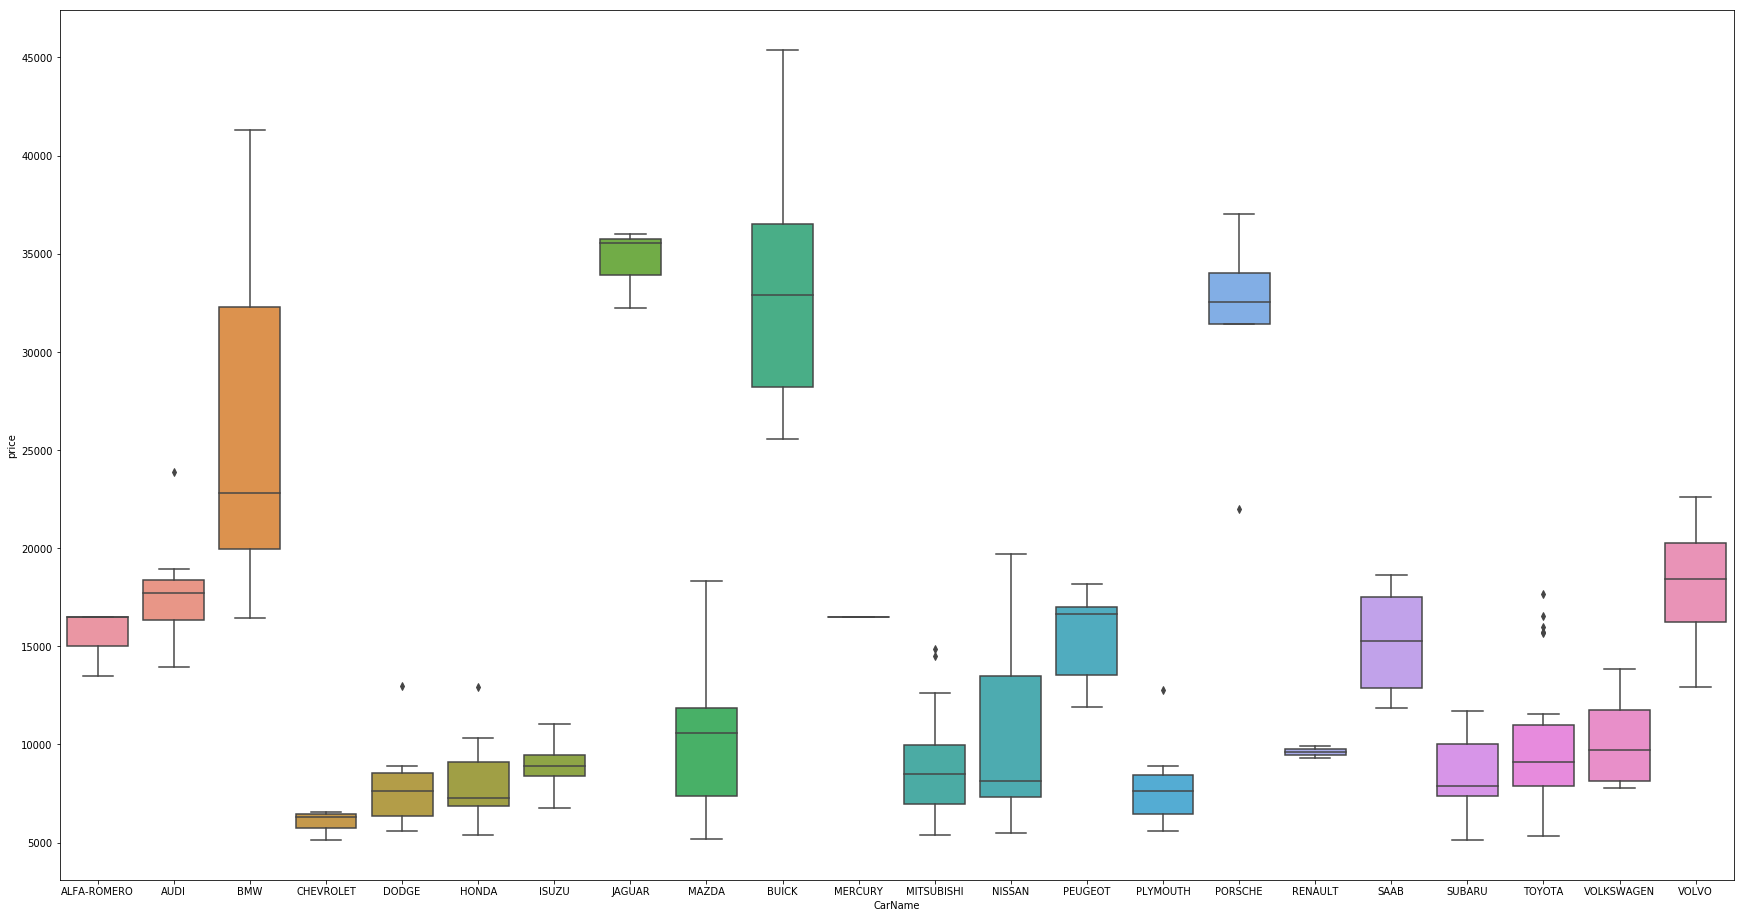

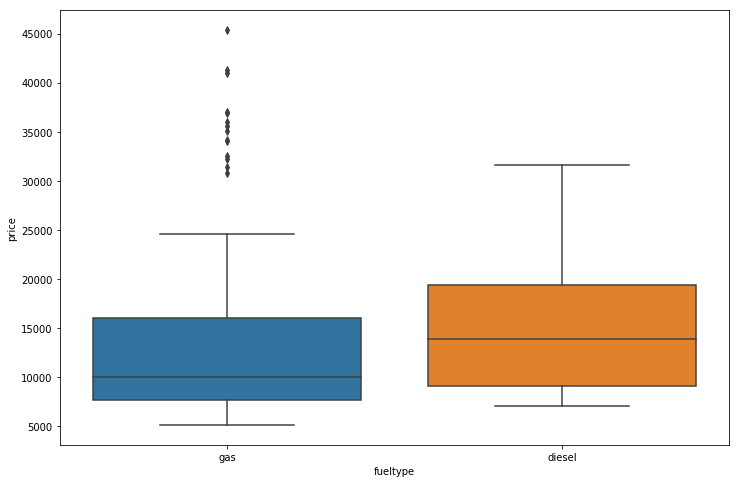

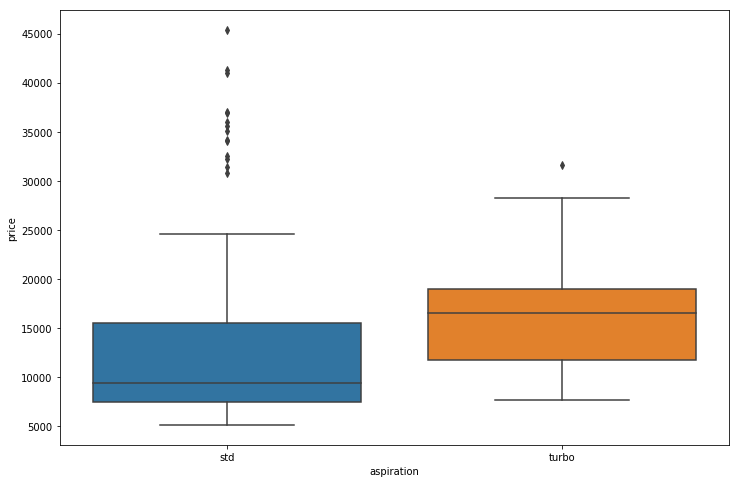

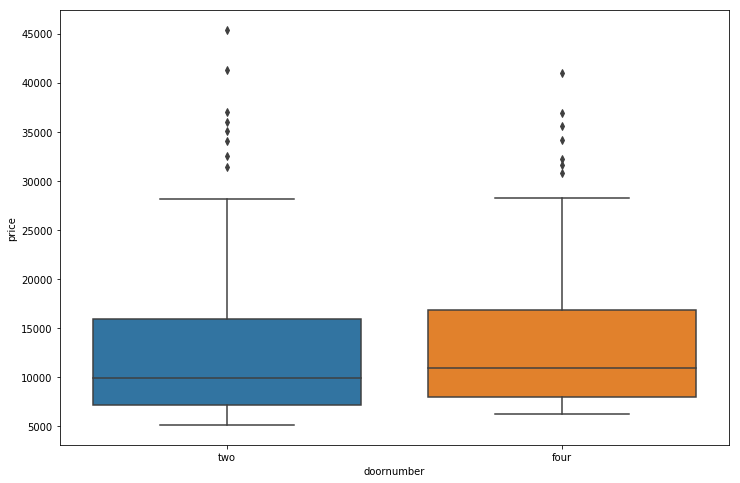

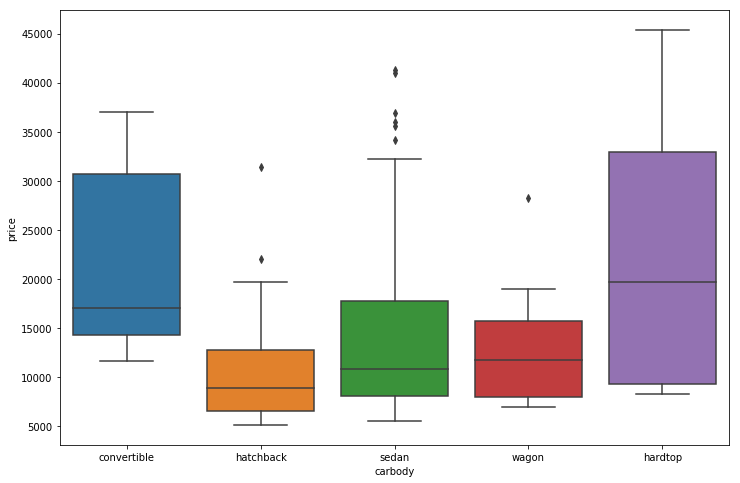

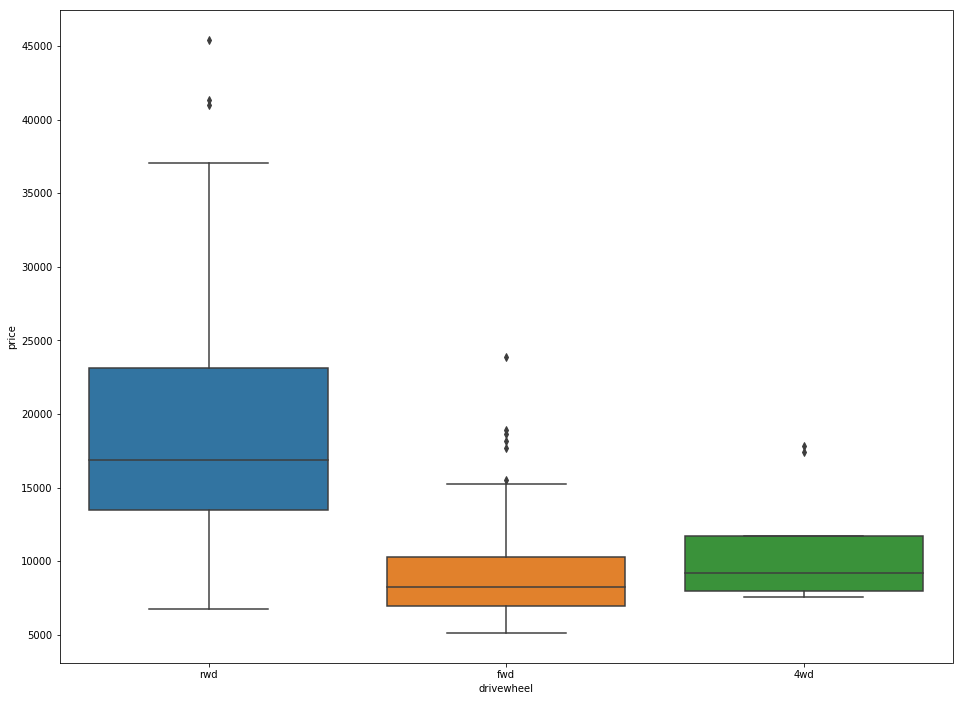

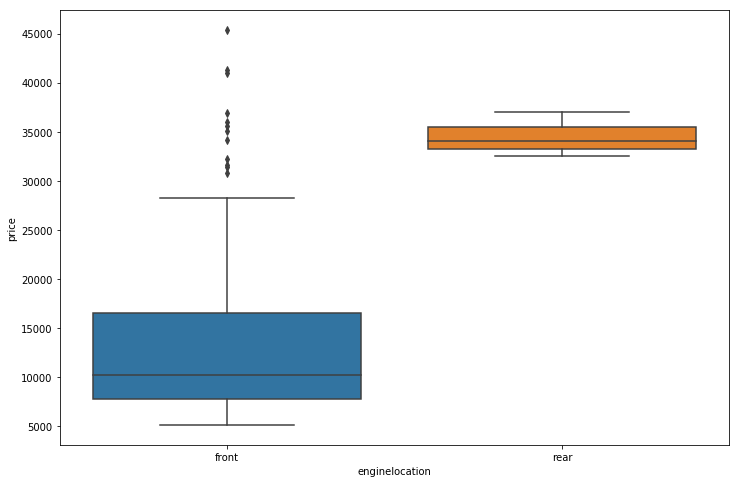

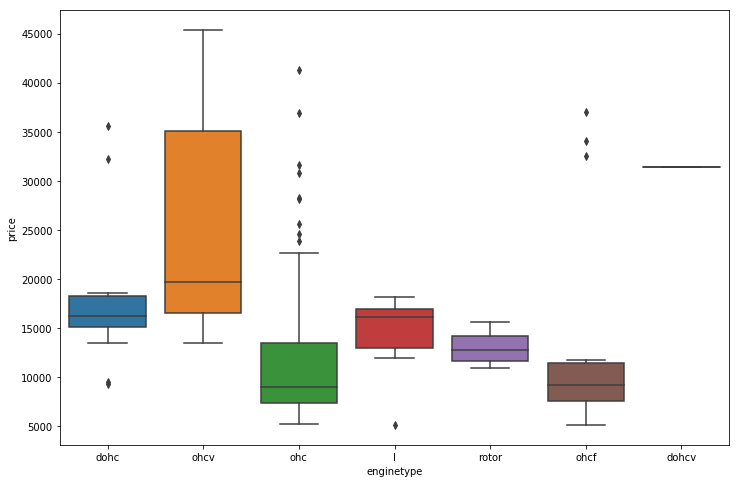

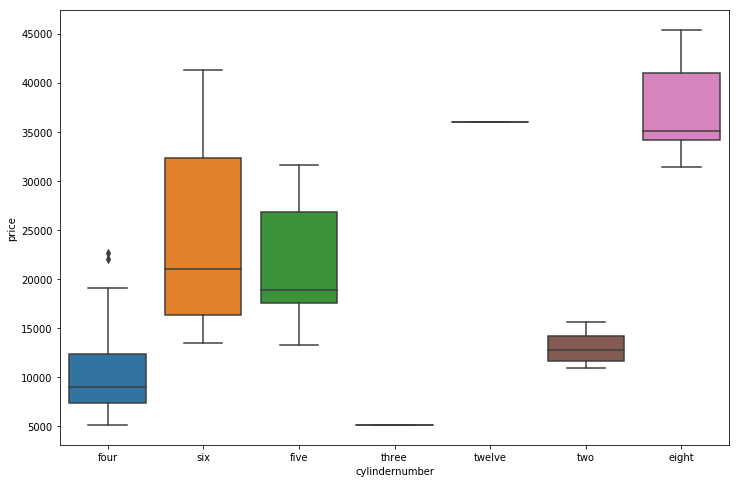

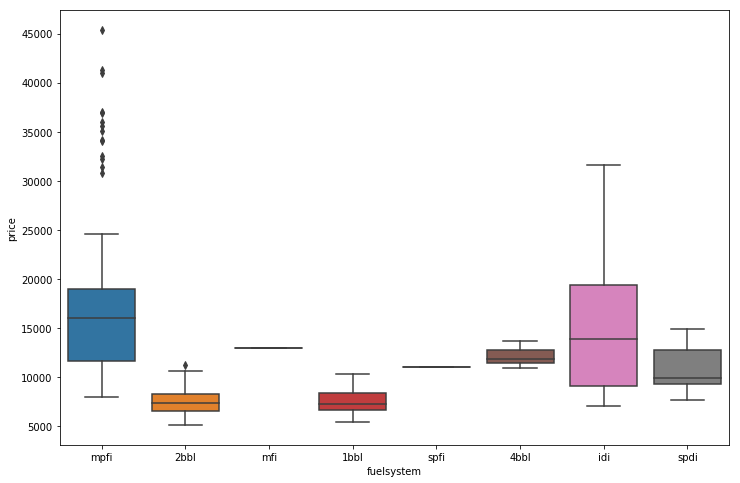

In [21]:
plt.figure(figsize=(30, 16))
sns.boxplot(x = 'CarName', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'fueltype', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'aspiration', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'doornumber', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'carbody', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(16, 12))
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'enginetype', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pr)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pr)
plt.show()

### <font color=green> Observations from the above boxplots: 
We can clearly see that for all the categorical variables above (except for **DoorNumber**, where there is only slight price variation when the levels change from two door to four door), the price of the car changes significantly with the levels under each categorical variable which indicates that all these variables do affect the car price.</font>

## <font color=blue>Step 3: Data Preparation</font>

In [22]:
from sklearn import preprocessing

In [23]:
le=preprocessing.LabelEncoder()

### <font color=purple> Label Encoder for ordinal categorical variables:doornumber and cylindernumber</font>

In [24]:
# Using Label encoding for the below two ordinal categorical variables
car_pr['doornumber']=le.fit_transform(car_pr['doornumber'])
car_pr['cylindernumber']=le.fit_transform(car_pr['cylindernumber'])

In [25]:
car_pr.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,AUDI,gas,std,0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,AUDI,gas,std,0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### <font color=purple>Dummy Variables</font>

In [26]:
# Use pd.get_dummies for the rest eight categorical variables
df1=pd.get_dummies(car_pr['CarName'],drop_first=True)
df2=pd.get_dummies(car_pr['fueltype'],drop_first=True)
df3=pd.get_dummies(car_pr['aspiration'],drop_first=True)
df4=pd.get_dummies(car_pr['carbody'],drop_first=True)
df5=pd.get_dummies(car_pr['drivewheel'],drop_first=True)
df6=pd.get_dummies(car_pr['enginelocation'],drop_first=True)
df7=pd.get_dummies(car_pr['enginetype'],drop_first=True)
df8=pd.get_dummies(car_pr['fuelsystem'],drop_first=True)

In [27]:
car_pr=pd.concat([car_pr,df1,df2,df3,df4,df5,df6,df7,df8], axis=1)

In [28]:
car_pr.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCURY,MITSUBISHI,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,ALFA-ROMERO,gas,std,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,ALFA-ROMERO,gas,std,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,ALFA-ROMERO,gas,std,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,AUDI,gas,std,0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,AUDI,gas,std,0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [29]:
# Removing the columns for which dummies have been created
car_pr.drop(['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'],axis=1,inplace=True)

In [30]:
car_pr.head(3)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCURY,MITSUBISHI,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,94.5,171.2,65.5,52.4,2823,3,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [31]:
car_pr.shape

(205, 60)

In [32]:
# Checking for any non-numerical datatype
car_pr.dtypes

symboling             int64
doornumber            int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber        int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
AUDI                  uint8
BMW                   uint8
BUICK                 uint8
CHEVROLET             uint8
DODGE                 uint8
HONDA                 uint8
ISUZU                 uint8
JAGUAR                uint8
MAZDA                 uint8
MERCURY               uint8
MITSUBISHI            uint8
NISSAN                uint8
PEUGEOT               uint8
PLYMOUTH              uint8
PORSCHE               uint8
RENAULT               uint8
SAAB                  uint8
SUBARU                uint8
TOYOTA              

## <font color=blue>Step 4: Splitting the Data into Training and Testing Sets</font>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
car_pr_train, car_pr_test = train_test_split(car_pr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
print(car_pr_train.shape)
print(car_pr_test.shape)

(143, 60)
(62, 60)


### <font color=purple>Rescaling the Features using Standardization</font>

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

In [39]:
# Scaling on the train dataframe
car_pr_train[num_vars]=scaler.fit_transform(car_pr_train[num_vars])

In [40]:
car_pr_train.shape

(143, 60)

In [41]:
car_pr_train.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,143.0,5.473477e-17,1.003515,-2.347020,-0.668901,0.170159,0.170159,1.848278
doornumber,143.0,-9.006005e-17,1.003515,-0.887412,-0.887412,-0.887412,1.126872,1.126872
wheelbase,143.0,1.538785e-15,1.003515,-2.006930,-0.677177,-0.340531,0.450588,2.874442
carlength,143.0,2.003060e-16,1.003515,-2.574223,-0.618670,-0.112855,0.707601,2.324616
carwidth,143.0,-4.093074e-15,1.003515,-2.510760,-0.856517,-0.199352,0.480474,2.927846
carheight,143.0,5.450186e-16,1.003515,-2.371619,-0.722298,0.061129,0.741473,2.287711
curbweight,143.0,-1.894367e-16,1.003515,-1.937401,-0.771103,-0.247835,0.720396,2.812547
cylindernumber,143.0,-2.732857e-16,1.003515,-2.450567,-0.196991,-0.196991,-0.196991,4.310161
enginesize,143.0,-4.308908e-17,1.003515,-1.566427,-0.684734,-0.366345,0.392891,4.923816
boreratio,143.0,-1.059758e-15,1.003515,-2.412359,-0.932060,0.009948,0.894283,2.432256


In [42]:
car_pr_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCURY,MITSUBISHI,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.170159,-0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.196991,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,-0.700201,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,1.848278,1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.196991,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,1.151929,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.170159,1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.196991,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.452248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.848278,1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.196991,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0.442646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
199,-1.507960,-0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.196991,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,0.757569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


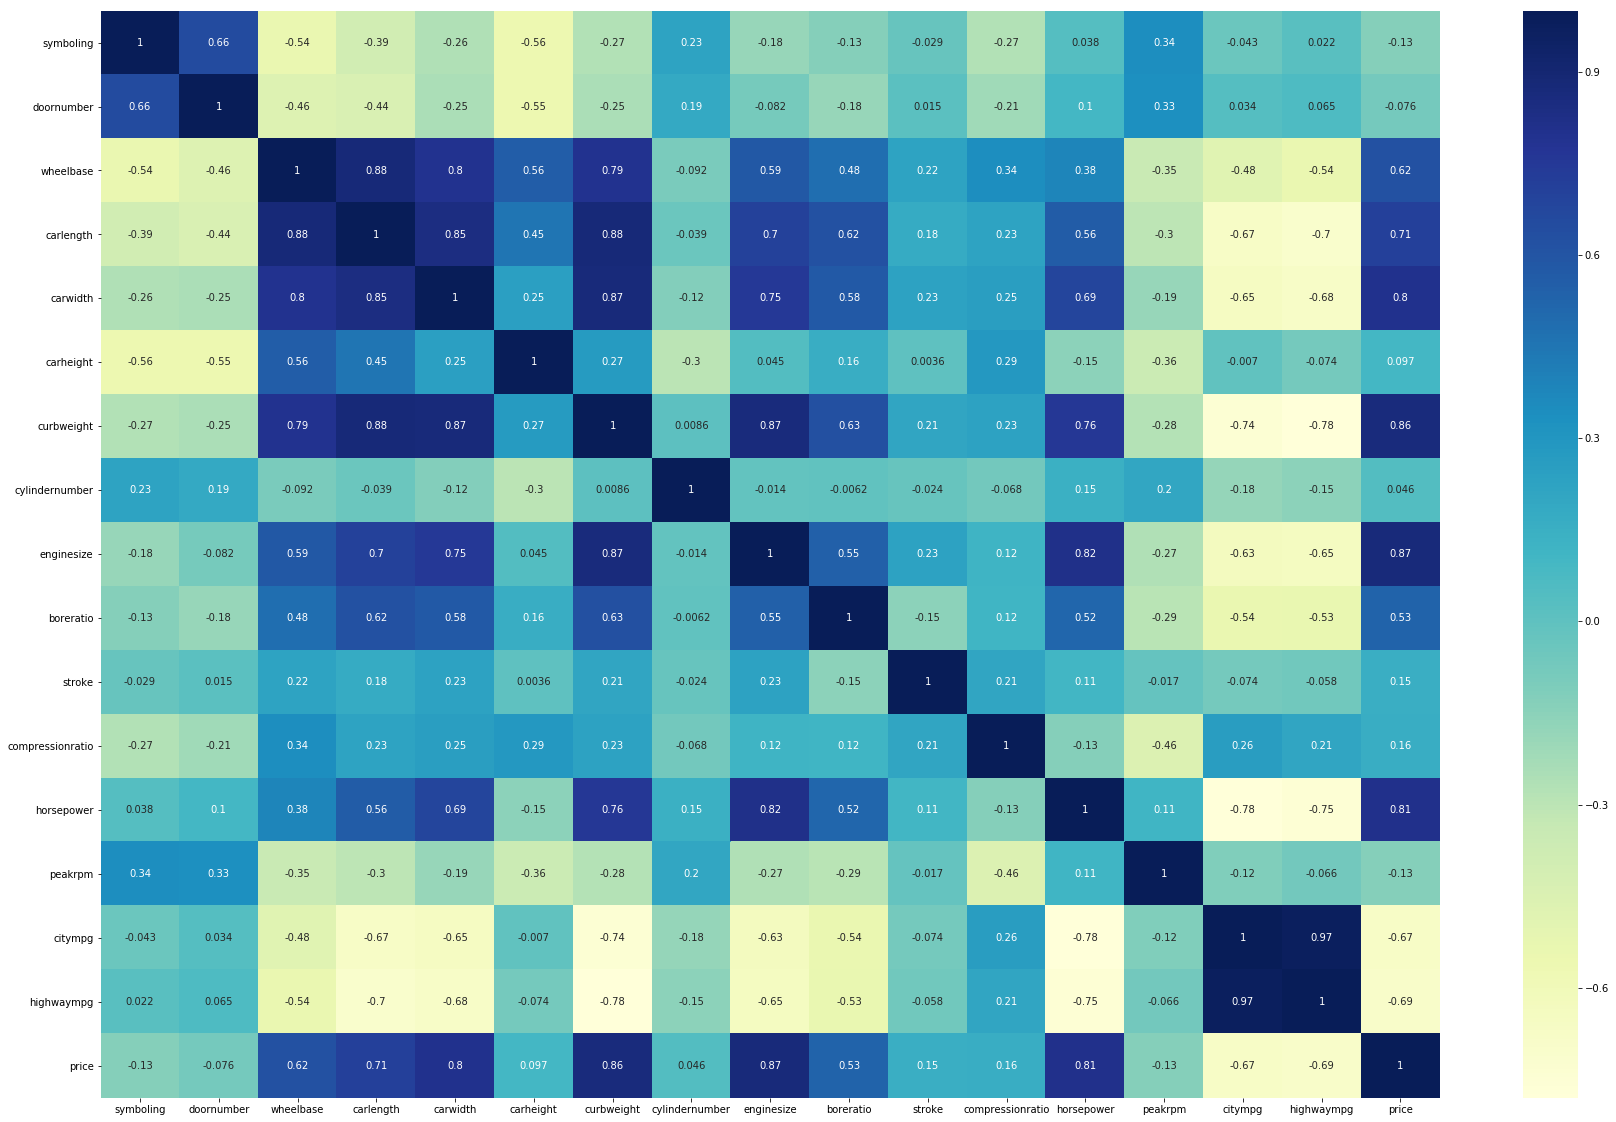

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(car_pr_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color=green> Observation: As can be seen above, we have got many variables which are highly correlated to each other(as also observed in the pairplot).

### <font color=purple>Dividing into X and Y sets for the model building</font>


In [44]:
y_train = car_pr_train.pop('price')
X_train = car_pr_train

### <font color=purple>Building our model using RFE(Recursive feature elimination)</font>


In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('doornumber', False, 36),
 ('wheelbase', False, 13),
 ('carlength', False, 7),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', False, 6),
 ('cylindernumber', False, 21),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 30),
 ('peakrpm', False, 25),
 ('citympg', False, 31),
 ('highwaympg', False, 28),
 ('AUDI', False, 4),
 ('BMW', True, 1),
 ('BUICK', False, 22),
 ('CHEVROLET', False, 3),
 ('DODGE', True, 1),
 ('HONDA', True, 1),
 ('ISUZU', False, 8),
 ('JAGUAR', False, 27),
 ('MAZDA', True, 1),
 ('MERCURY', False, 38),
 ('MITSUBISHI', True, 1),
 ('NISSAN', True, 1),
 ('PEUGEOT', True, 1),
 ('PLYMOUTH', False, 2),
 ('PORSCHE', False, 14),
 ('RENAULT', True, 1),
 ('SAAB', False, 12),
 ('SUBARU', True, 1),
 ('TOYOTA', True, 1),
 ('VOLKSWAGEN', True, 1),
 ('VOLVO', False, 26),
 ('gas', True, 1),
 ('turbo', False, 19),
 ('hardtop', False, 15),
 ('hatchback', Fal

In [48]:
# Showing the variables which RFE kept with the constraint that the number of variables be 20
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'enginesize', 'compressionratio', 'BMW', 'DODGE', 'HONDA',
       'MAZDA', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'gas', 'rear', 'l', 'ohcf', 'rotor', 'idi'],
      dtype='object')

In [49]:
# Showing the variables which RFE did not keep
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'curbweight', 'cylindernumber', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'AUDI', 'BUICK', 'CHEVROLET',
       'ISUZU', 'JAGUAR', 'MERCURY', 'PLYMOUTH', 'PORSCHE', 'SAAB', 'VOLVO',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'ohc', 'ohcv', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

### <font color=purple>Building model using statsmodel, for the detailed statistics</font>

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [53]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.27e-65
Time:                        21:56:13   Log-Likelihood:                -6.3356
No. Observations:                 143   AIC:                             50.67
Df Residuals:                     124   BIC:                             107.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6142      0.152  

### <font color=green> Observation: Although almost all the variable coefficients are significant but as could be seen in the "Warnings" at the bottom of above summary and also as suspected there is a major collinearity problem here which we need to solve now.</font>

### <font color=purple>Checking VIF scores for the predictor variables</font>

In [54]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'compressionratio', 'BMW', 'DODGE',
       'HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'gas', 'rear', 'l', 'ohcf', 'rotor',
       'idi'],
      dtype='object')

In [55]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,ohcf,inf
15,rear,inf
11,SUBARU,inf
2,compressionratio,42.990000
19,idi,42.290000
9,PEUGEOT,9.970000
16,l,9.580000
14,gas,7.370000
0,carwidth,3.790000
1,enginesize,3.480000


### <font color=green> Observation: There are eight variables which have a VIF greater than 5 among which three have a very high VIF of infinity. Hence we will start by removing the first variable with the VIF of infinity and recreate the model and then check again for the model parameters and VIF</font>

### <font color=purple> Rebuilding the model without `ohcf`</font>

In [57]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'compressionratio', 'BMW', 'DODGE',
       'HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'gas', 'rear', 'l', 'ohcf', 'rotor',
       'idi'],
      dtype='object')

In [58]:
X_train_rfe = X_train_rfe.drop(["ohcf"], axis = 1)

In [59]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'compressionratio', 'BMW', 'DODGE',
       'HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'gas', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [60]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.27e-65
Time:                        21:56:14   Log-Likelihood:                -6.3356
No. Observations:                 143   AIC:                             50.67
Df Residuals:                     124   BIC:                             107.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6142      0.152  

### <font color=green> Observation: Again we have a warning stating high collinearity problem here with almost all the coefficients being significant which we need to solve further.</font>

### <font color=purple>Checking VIF scores for the predictor variables</font>

In [62]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,compressionratio,42.99
18,idi,42.29
9,PEUGEOT,9.97
16,l,9.58
14,gas,7.37
0,carwidth,3.79
1,enginesize,3.48
6,MAZDA,1.79
17,rotor,1.55
12,TOYOTA,1.51


### <font color=green> Observation: Although we dont any variable now with a VIF of infinity but we still have variables with high VIF.</font>

### <font color=purple> Rebuilding the model without `compressionratio`</font>

In [64]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'compressionratio', 'BMW', 'DODGE',
       'HONDA', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'gas', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [65]:
X_train_rfe = X_train_rfe.drop(["compressionratio"], axis = 1)

In [66]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'gas', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [67]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.42e-64
Time:                        21:56:14   Log-Likelihood:                -11.212
No. Observations:                 143   AIC:                             58.42
Df Residuals:                     125   BIC:                             111.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1817      0.042      4.281      0.0

### `gas` is insignificant in presence of other variables; can be dropped

In [69]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'gas', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [70]:
X_train_rfe = X_train_rfe.drop(["gas"], axis = 1)

In [71]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [72]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.42e-64
Time:                        21:56:14   Log-Likelihood:                -11.212
No. Observations:                 143   AIC:                             58.42
Df Residuals:                     125   BIC:                             111.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.051      3.790      0.0

### `l` is insignificant in presence of other variables; can be dropped

In [74]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'l', 'rotor', 'idi'],
      dtype='object')

In [75]:
X_train_rfe = X_train_rfe.drop(["l"], axis = 1)

In [76]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'rotor', 'idi'],
      dtype='object')

In [77]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.25e-64
Time:                        21:56:15   Log-Likelihood:                -12.758
No. Observations:                 143   AIC:                             59.52
Df Residuals:                     126   BIC:                             109.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.050      4.303      0.0

### `idi` is insignificant in presence of other variables; can be dropped

In [79]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'rotor', 'idi'],
      dtype='object')

In [80]:
X_train_rfe = X_train_rfe.drop(["idi"], axis = 1)

In [81]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'rotor'],
      dtype='object')

In [82]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [83]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.68e-65
Time:                        21:56:15   Log-Likelihood:                -14.563
No. Observations:                 143   AIC:                             61.13
Df Residuals:                     127   BIC:                             108.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2259      0.049      4.565      0.0

### <font color=purple>Checking VIF scores for the predictor variables</font>

In [84]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.43
0,carwidth,3.36
14,rotor,1.54
5,MAZDA,1.47
8,PEUGEOT,1.16
2,BMW,1.10
13,rear,1.10
7,NISSAN,1.05
3,DODGE,1.04
4,HONDA,1.03


### <font color=green> Observation: All the variables now are within the permissible VIF range.</font>

### <font color=green> Observation: Although all the variables which we have now are within the permissible VIF range and are also significant and return a very good score of Adjusted R2 but still going from Business understanding it is harder to interpret the coefficients for the models with the price variable and hence we will try removing all the car-brand names and see if the model is good or not.</font>

In [86]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN', 'rear', 'rotor'],
      dtype='object')

In [87]:
X_train_rfe_test = X_train_rfe.drop(['BMW', 'DODGE', 'HONDA', 'MAZDA',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUBARU', 'TOYOTA',
       'VOLKSWAGEN'], axis = 1)

In [88]:
X_train_rfe_test.columns

Index(['const', 'carwidth', 'enginesize', 'rear', 'rotor'], dtype='object')

In [89]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_test).fit()   

In [90]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     185.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.63e-54
Time:                        21:56:15   Log-Likelihood:                -70.343
No. Observations:                 143   AIC:                             150.7
Df Residuals:                     138   BIC:                             165.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0366      0.034     -1.066      0.2

### <font color=green> Observation: Although we can see that Adjusted R2 has decreased and AIC/BIC have increased, but the model fit i.e F(statistics) has improved and it is easier from a Business perspective to interpret the remaining coefficients. `Hence this will be our final model`</font>

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_pred = lm.predict(X_train_rfe_test)

Text(0.5,0,'Errors')

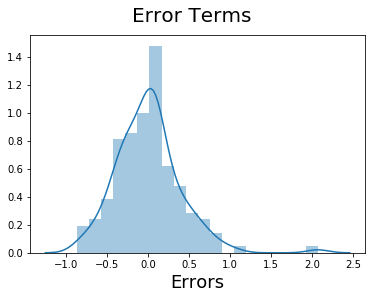

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

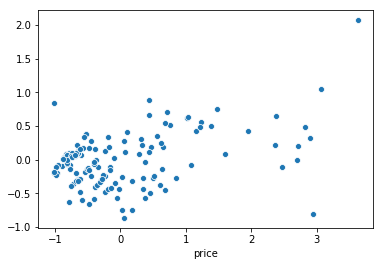

In [93]:
sns.scatterplot(x=y_train, y=y_train - y_train_pred)
plt.show()

### <font color=green> Observation: Although the error distribution is not perfectly normally distributed, it is still a very close approximation of a normal distribution with mean as 0. Also the errors are randomly ditributed with approximately constant variation</font>

## Making Predictions

#### Applying the scaling on the test sets

In [94]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

In [95]:
car_pr_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCURY,MITSUBISHI,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0,0,95.7,166.3,64.4,53.0,2094,2,98,3.19,3.03,9.0,70,4800,38,47,7738.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
186,2,0,97.3,171.7,65.5,55.7,2275,2,109,3.19,3.40,9.0,85,5250,27,34,8495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,1,1,98.8,177.8,66.5,53.7,2385,2,122,3.39,3.39,8.6,84,4800,26,32,8845.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
165,1,1,94.5,168.7,64.0,52.6,2265,2,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,2,1,93.3,157.3,63.8,55.7,2240,2,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [96]:
car_pr_test[num_vars]=scaler.transform(car_pr_test[num_vars])

In [97]:
car_pr_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCURY,MITSUBISHI,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,-0.668901,-0.887412,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.196991,-0.660242,-0.451443,-0.706633,-0.278345,-0.822372,-0.688236,1.887918,2.320526,-0.683619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
186,1.009219,-0.887412,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.196991,-0.390836,-0.451443,0.481417,-0.278345,-0.443427,0.250069,0.240833,0.449816,-0.586315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,0.170159,1.126872,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.196991,-0.072447,0.317543,0.449308,-0.384120,-0.468690,-0.688236,0.091098,0.162014,-0.541326,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
165,0.170159,1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.196991,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.483097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,1.009219,1.126872,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.196991,-0.415328,1.201877,-1.958901,-0.357676,-0.746583,-1.522285,0.091098,0.018113,-0.700972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [98]:
y_test = car_pr_test.pop('price')
X_test = car_pr_test

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe using only the variables we got from the train set for the price prediction
X_test_new = X_test[['carwidth', 'enginesize', 'rear', 'rotor']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

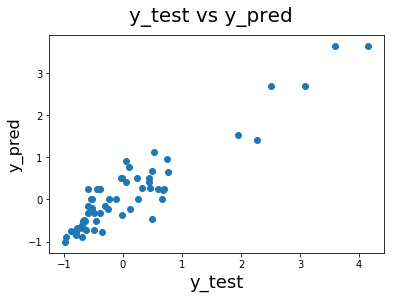

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)

In [104]:
# r2 on train data
r2

0.8434007565139827

In [105]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

In [106]:
# r2 on test data
r2

0.8714033044088033


We can see that the equation of our best fitted line is:

$ price = -0.0366 + 0.3332  \times  carwidth + 0.6259  \times  enginesize + 1.8007 \times rear + 0.8571 \times rotor $


## <font color=green> Thus, we can see that the price variable depends upon the 
    
##   `carwidth,enginesize,enginelocation(rear variable) and enginetype(rotor variable)`.